<a href="https://colab.research.google.com/github/tesscstanley/NEUR265/blob/main/coding_homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #5

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw5.csv</code> and <code>acc_fa_hw5.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code> and <code>acc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array. 

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex. Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). The task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> variable contains LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> variable contains LFP surrounding these false alarms. So, you have two arrays - one array with LFP recorded during correct choices (hits), and one array with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as <code>acc_hits</code> and <code>acc_fa</code>, with equally spaced values between "zero" and "four" (the length of each trial, in seconds). 

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in one subplot, and the first trial of <code>acc_fa</code> in another subplot. Plot your <code>time</code> variable on the x-axis. Label your axes.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation (in Hz) in the LFP might be. Does this differ between the first trial of <code>acc_hits</code> and the first trial of <code>acc_fa</code>? 

10. We want to have some way to compare LFPs between the two conditions (hits and false alarms). One way to do this might be to compute an event-related potential (ERP) to see if there are structural changes surrounding screen touch for either of the two conditions. In a new *Code Cell*, calculate and plot the ERP for <code>acc_hits</code>. Put <code>time</code> on the x-axis. Put a vertical black line at the "two" position on the x-axis (the screen touch occurred 2 seconds into the sample on each trial). Put a horizontal black line at the "zero" position on the y-axis. Label your axes.

11. In a new *Markdown Cell*, interpret your ERP for hits. Do you see any evidence of consistent activity in the LFP surrounding screen touch (vertical black bar)? 

12. Repeat step 10 for <code>acc_fa</code>. Plot your ERP for <code>acc_fa</code> and your ERP for <code>acc_hits</code> in one plot, with <code>time</code> on the x-axis. Make a vertical and horizontal black bar on your plot (as outlined in step 10), and label your axes. 

13. In a new *Markdown Cell*, interpret your plot from step 12. Are there any differences in the ERPs between hits and false alarms? 

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_5.ipynb</code>.

### Tess Stanley
*NEUR 265: Intro to Neural Data Analysis*

**03/27/2023**

In [2]:
# Step 2: Importing numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 3: importing the acc_hits_hw5.csv and acc_fa_hw5.csv files as numpy arrays 
url1 = 'https://raw.githubusercontent.com/tesscstanley/NEUR265/main/acc_hits_hw5.csv'
acc_hits = np.loadtxt(url1, delimiter = ',')

url2 = 'https://raw.githubusercontent.com/tesscstanley/NEUR265/main/acc_fa_hw5.csv'
acc_fa = np.loadtxt(url2, delimiter = ',')

In [4]:
# Step 4: printing the shape of each array
print(acc_hits.shape)
print(acc_fa.shape)

(24, 8001)
(19, 8001)


In [5]:
# Step 6: creating variable time with the same length as acc_hits and acc_fa with equally spaced values between 0 and 4
time = np.linspace(0,4,8001)
print(time)

[0.0000e+00 5.0000e-04 1.0000e-03 ... 3.9990e+00 3.9995e+00 4.0000e+00]


In [6]:
# Step 7: expression to find sampling rate
8001/4

2000.25

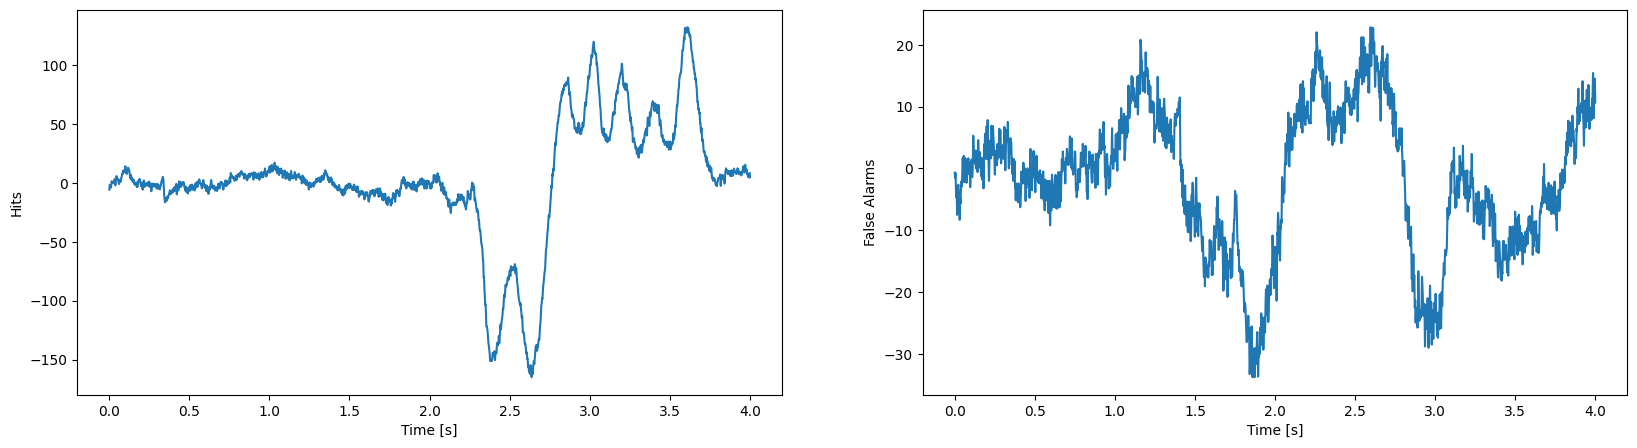

In [7]:
# Step 8: plotting the first trial of acc_hits in one subplot and the first trial of acc_fa in another subplot
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].plot(time[:8001], acc_hits[0,:8001])
ax[0].set_ylabel('Hits')
ax[0].set_xlabel('Time [s]')
ax[1].plot(time[:8001], acc_fa[0,:8001])
ax[1].set_ylabel('False Alarms')
ax[1].set_xlabel('Time [s]')
plt.show()

##### Step 9: describe what you think the dominant oscillation (in Hz) in the LFP might be. Does this differ between the first trial of acc_hits and the first trial of acc_fa?

For the Hits plot, I believe that the dominant oscillation is 6Hz, which falls within Theta waves, and the dominant oscillation is 2Hz for the False Alarm plot, which falls within Delta waves. In comparing these two, it is clear that the False Alarm plot has lower-frequency oscillations than the Hits data. 

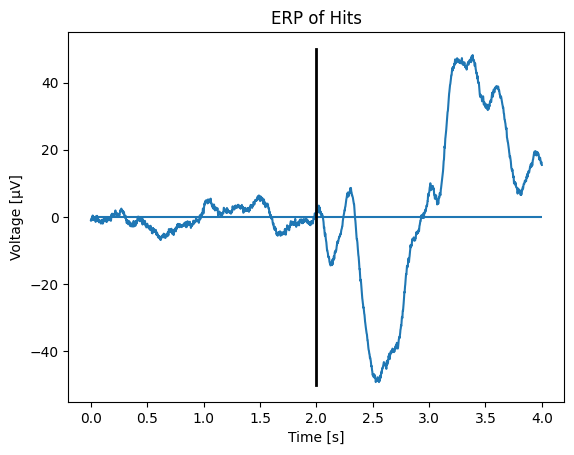

In [8]:
# Step 10: calculating ERP for acc_hits
plt.plot(time, acc_hits.mean(0))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [μV]')
plt.title('ERP of Hits')
plt.hlines(0, time[0], time[-1])
plt.plot([2, 2], [-50,50], 'k', lw=2)

#### Step 11: Interpreting your ERP for Hits plot. Do you see any evidence of consistent activity in the LFP surrounding screen touch (vertical black bar)?
The vertical black line represents the time when the specific type of stimulus is displayed to the mouse. On average, before the stimulus, the LFP data shows an overall average of neural activity, however, after this stimulus, the LFP data shows an evoked neural response to the stimulus. 

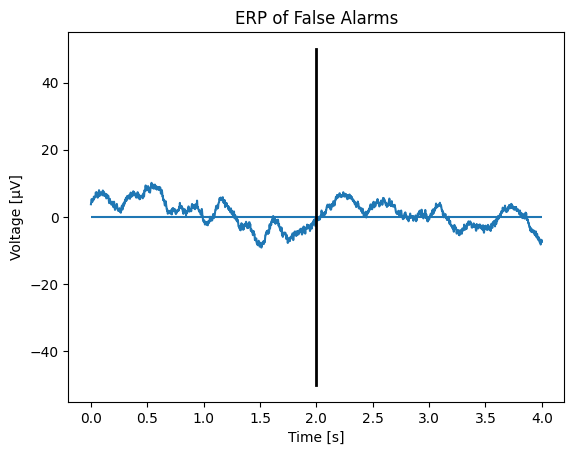

In [9]:
# Step 12: calculating ERP for acc_fa
plt.plot(time, acc_fa.mean(0))
plt.xlabel('Time [s]')
plt.ylabel('Voltage [μV]')
plt.title('ERP of False Alarms')
plt.hlines(0, time[0], time[-1])
plt.plot([2, 2], [-50,50], 'k', lw=2)

#### Step 13: Do you see any evidence of consistent activity in the LFP surrounding screen touch (vertical black bar)? Are there any differences in the ERPs between hits and false alarms?
Similar to above, the vertical black line represents the time when the specific type of stimulus is displayed to the mouse. However, while the "Hits" plot shows an evoked response after the stimulus, the "False Alarm" plot does not show a specific response to the stimulus in the LFP data. This may because the False Alarm data shows responses to a stimulus that is not the target stimulus, and therefore LFP activity unrelated to the target stimulus may not show up in the averaging of the data and the plot may not display a ERP in response to the stimulus.

